In [2]:
import scipy.spatial.distance

"""Some important Ptolemaic metric spaces are 4-embeddable into R^3.
Connor mentions a tetrahedron lower bound: When all but one distances
between four points are known, the last one can be lower bounded as the
shortest side of a tetrahedron. This would be a degenerate tetrahedron,
with the two known triangles sharing one side and lying in the same plane.
"""

'Some important Ptolemaic metric spaces are 4-embeddable into R^3.\nConnor mentions a tetrahedron lower bound: When all but one distances\nbetween four points are known, the last one can be lower bounded as the\nshortest side of a tetrahedron. This would be a degenerate tetrahedron,\nwith the two known triangles sharing one side and lying in the same plane.\n'

In [3]:
import numpy as np
from sympy import *
# from algebra_with_sympy import *

init_printing(use_latex="mathjax")

dist_prop = dict(real=True, positive=True)
# generic symbols
A, s, a, b, c, h = symbols("A s a b c h", **dist_prop)

# Heron
semiperimeter = {s: (a + b + c) / 2}
area = sqrt(s * (s - a) * (s - b) * (s - c))

height_over_a = 2 / a * area.subs(semiperimeter)

area, semiperimeter

⎛     ____________________________  ⎧   a   b   c⎫⎞
⎜√s⋅╲╱ (-a + s)⋅(-b + s)⋅(-c + s) , ⎨s: ─ + ─ + ─⎬⎟
⎝                                   ⎩   2   2   2⎭⎠

![](img.png)

In [4]:
# we have two pivots, a query (center) and an object
# we want to lower bound d(q,o)
# we know all other distances

# the two resulting triangles have a shared base p0-p1 of length p
p = symbols("p", **dist_prop)

# the query triangle has these other sides:
q0, q1 = symbols("q:2", **dist_prop)

# dito for the object triangle
o0, o1 = symbols("o:2", **dist_prop)


# we are repeating a lot of steps for both triangles
def q2o(term):
    subs = {q0: o0, q1: o1}
    return term.subs(subs)

In [5]:
# these triangles have heights that we can infer via Heron
hq = height_over_a.subs({a: p, b: q0, c: q1})
hq = factor(hq)
ho = q2o(hq)

hq

  ____________________________________________   _____________
╲╱ -(p - q₀ - q₁)⋅(p - q₀ + q₁)⋅(p + q₀ - q₁) ⋅╲╱ p + q₀ + q₁ 
──────────────────────────────────────────────────────────────
                             2⋅p                              

In [6]:
# the height "bisects" the shared base at these lengths,
# measured from one of the two possible vertices:
mq0 = factor(sqrt(q0**2 - hq**2))
mo0 = q2o(mq0)

mo0

│  2     2    2│
│o₀  - o₁  + p │
────────────────
      2⋅p       

In [7]:
# We know the height of the triangle w.r.t. q.
# Let's figure out the "width" or the "x-position" of the point q.

# Let q0 be on the left and q1 be on the right.
# If the triangle is acute:
m_ac = mq0

# If the triangle is obtuse, we have two cases:
# One where the point is to the left:
mob_left = -mq0
# And one where the point is to the right:
mob_right = mq0  # which is identical to m_ac

# left obtuse means that q1 has to be the longest side and
# that q1**2 > p**2 + q1**2
mq = Piecewise(
    (mob_left, q1**2 > p**2 + q0**2),  # And(And(q1 > p, q1 > q0) ,
    (m_ac, True),
)

mq

⎧ │ 2     2     2│                     
⎪-│p  + q₀  - q₁ │         2    2     2
⎪──────────────────  for q₁  > p  + q₀ 
⎪       2⋅p                            
⎨                                      
⎪ │ 2     2     2│                     
⎪ │p  + q₀  - q₁ │                     
⎪ ────────────────       otherwise     
⎩       2⋅p                            

In [8]:
# but this is just the same formula with the abs() removed
mq = mq.args[1][0].replace(Abs, lambda x: x)
mo = q2o(mq)
mq

 2     2     2
p  + q₀  - q₁ 
──────────────
     2⋅p      

In [30]:
x_dist = simplify(abs(mq - mo))
x_dist  # mathematica_code(x_dist)

│  2     2     2     2│
│o₀  - o₁  - q₀  + q₁ │
───────────────────────
          2⋅p          

In [31]:
diff(1 / 2 / p)

-0.5 
─────
   2 
  p  

In [28]:
solveset(diff(x_dist, p), p)

∅

In [27]:
# construct the right triangle which hypotenuse of length d connects q and o
# from h and m s

lb2 = (hq - ho) ** 2 + (mq - mo) ** 2

lb2 = simplify(lb2)
dist = simplify(sqrt(lb2))
lb2  # Mathematica can't simplify this any further

                                                                                                             
⎛  ____________________________________________   _____________     _________________________________________
⎝╲╱ (-o₀ + o₁ + p)⋅(o₀ - o₁ + p)⋅(o₀ + o₁ - p) ⋅╲╱ o₀ + o₁ + p  - ╲╱ (-p + q₀ + q₁)⋅(p - q₀ + q₁)⋅(p + q₀ - q
─────────────────────────────────────────────────────────────────────────────────────────────────────────────
                                                                                2                            
                                                                             4⋅p                             

                    2                          2
___   _____________⎞    ⎛  2     2     2     2⎞ 
₁) ⋅╲╱ p + q₀ + q₁ ⎠  + ⎝o₀  - o₁  - q₀  + q₁ ⎠ 
────────────────────────────────────────────────
                                                
                                                

In [10]:
# we can also find an upper bound this way:
# arrange the triangles so that one height is positive and one is negative:
ub2 = (hq + ho) ** 2 + (mq - mo) ** 2
ub2 = simplify(ub2)
ub2

                                                                                                             
⎛  ____________________________________________   _____________     _________________________________________
⎝╲╱ (-o₀ + o₁ + p)⋅(o₀ - o₁ + p)⋅(o₀ + o₁ - p) ⋅╲╱ o₀ + o₁ + p  + ╲╱ (-p + q₀ + q₁)⋅(p - q₀ + q₁)⋅(p + q₀ - q
─────────────────────────────────────────────────────────────────────────────────────────────────────────────
                                                                                2                            
                                                                             4⋅p                             

                    2                          2
___   _____________⎞    ⎛  2     2     2     2⎞ 
₁) ⋅╲╱ p + q₀ + q₁ ⎠  + ⎝o₀  - o₁  - q₀  + q₁ ⎠ 
────────────────────────────────────────────────
                                                
                                                

In [11]:
# test with a simple triangle:
tri0 = {
    p: 3,
    q0: 7,
    q1: 5,
}
tri1 = {
    p: tri0[p],
    o0: 10.77,
    o1: 12.21,
}

height0 = 4.33
m_base0 = 5.5
precision = 0.02

assert N(abs(hq.subs(tri0) - height0)) < precision, "wrong height!"
assert N(abs(mq0.subs(tri0) - m_base0)) < precision, "wrong intersect!"

true_dist = 11.06
this_lb = N(sqrt(lb2).subs(tri0).subs(tri1))
assert np.allclose(true_dist, float(this_lb), atol=precision), old_lb

In [12]:
# test with a "hard" triangle
trih = {
    p: 32.44996148,
    q0: 65.76473219,
    q1: 38.83297568,
    o0: 64.5368112,
    o1: 36.22154055,
}

assert np.abs(hq.subs(trih) - 27.74) < precision
assert np.abs(ho.subs(trih) - 23.3) < precision
mq0.subs(trih) - 32.45, mo0.subs(trih) - 32.45

assert np.allclose(float(sqrt(lb2).subs(trih)), 4.47, atol=precision)

In [13]:
cse([lb2, ub2])

⎛⎡⎛                           2⎞                                                                             
⎜⎢⎜    ⎛  2     2     2     2⎞ ⎟                           ⎛      ________________________________________   
⎜⎢⎝x₀, ⎝o₀  - o₁  - q₀  + q₁ ⎠ ⎠, (x₁, o₀ + o₁), (x₂, -p), ⎝x₃, ╲╱ (x₁ + x₂)⋅(-o₀ + o₁ + p)⋅(o₀ - o₁ + p) ⋅╲╱
⎜⎢                                                                                                           
⎝⎣                                                                                                           

                                                                                                  ⎤          
________⎞                ⎛      _________________________________________   _________⎞  ⎛     1  ⎞⎥  ⎡   ⎛   
 p + x₁ ⎠, (x₄, p + q₀), ⎝x₅, ╲╱ (-q₁ + x₄)⋅(p - q₀ + q₁)⋅(q₀ + q₁ + x₂) ⋅╲╱ q₁ + x₄ ⎠, ⎜x₆, ────⎟⎥, ⎣x₆⋅⎝x₀ 
                                                                                        ⎜       2⎟⎥          
         

In [14]:
# some mappings are too simple to be worth the rewriting
def eliminate_mappings(mappings, expressions, ignore_idx):
    ignore = [mappings[i] for i in ignore_idx]
    mappings = [i for i in mappings if i not in ignore]

    ignore = [(m[0], m[1].subs(ignore)) for m in ignore]
    mappings = [(m[0], m[1].subs(ignore)) for m in mappings]
    expressions = [e.subs(ignore) for e in expressions]
    return mappings, expressions


ignore_idx = [2, 6]
mappings, expressions = eliminate_mappings(*cse([lb2, ub2]), ignore_idx)
expressions

⎡              2                2⎤
⎢x₀ + (x₃ - x₅)   x₀ + (x₃ + x₅) ⎥
⎢───────────────, ───────────────⎥
⎢         2                2     ⎥
⎣      4⋅p              4⋅p      ⎦

In [15]:
hq

  ____________________________________________   _____________
╲╱ -(p - q₀ - q₁)⋅(p - q₀ + q₁)⋅(p + q₀ - q₁) ⋅╲╱ p + q₀ + q₁ 
──────────────────────────────────────────────────────────────
                             2⋅p                              

In [16]:
yq, yo = symbols("y_q y_o")
lb2.replace(hq, yq)

                                                                                                             
⎛  ____________________________________________   _____________     _________________________________________
⎝╲╱ (-o₀ + o₁ + p)⋅(o₀ - o₁ + p)⋅(o₀ + o₁ - p) ⋅╲╱ o₀ + o₁ + p  - ╲╱ (-p + q₀ + q₁)⋅(p - q₀ + q₁)⋅(p + q₀ - q
─────────────────────────────────────────────────────────────────────────────────────────────────────────────
                                                                                2                            
                                                                             4⋅p                             

                    2                          2
___   _____________⎞    ⎛  2     2     2     2⎞ 
₁) ⋅╲╱ p + q₀ + q₁ ⎠  + ⎝o₀  - o₁  - q₀  + q₁ ⎠ 
────────────────────────────────────────────────
                                                
                                                

In [17]:
mathematica_code(lb2)

'(1/4)*((((-o0 + o1 + p)*(o0 - o1 + p)*(o0 + o1 - p))^(1/2)*(o0 + o1 + p)^(1/2) - ((-p + q0 + q1)*(p - q0 + q1)*(p + q0 - q1))^(1/2)*(p + q0 + q1)^(1/2))^2 + (o0^2 - o1^2 - q0^2 + q1^2)^2)/p^2'

In [ ]:
solve(diff(lb2, p), p)

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7d2ee9d283e0>>
Traceback (most recent call last):
  File "/usr/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


In [14]:
# TODO: refactor me
def piecewise_to_maca(term: Piecewise, pretty=False):
    """Return Mathematica code for Piecewise objects.

    mathematica_code(term) cannot handle Piecewise objects.
    """
    pieces = []

    def to_maca(term):
        return mathematica_code(term)

    for term, condition in term.args:
        pieces.append("{" + to_maca(term) + "," + to_maca(condition) + "}")

    if not pretty:
        args = ",".join(pieces)
    else:
        args = ",\n".join(pieces)
        args = "\n" + args + "\n"

    return "Piecewise[{" + args + "}]"

In [15]:
from sympy.parsing.mathematica import parse_mathematica


def from_maca(string, free_symbols):
    term = parse_mathematica(string)
    term = term.replace(Function("Abs"), abs)
    # symbols don't get matched automatically
    for s in free_symbols:
        term = term.replace(symbols(str(s)), s)
    return term


string = """
(1/(4 p^2))((Sqrt[(o0 + o1 - p) (o0 - o1 + p) (-o0 + o1 + p) (o0 + 
       o1 + p)] - 
    Sqrt[(p + q0 - q1) (p - q0 + q1) (-p + q0 + q1) (p + q0 + 
       q1)])^2 + (Abs[o0^2 - o1^2 + p^2] - Abs[p^2 + q0^2 - q1^2])^2)
"""
free_symbols = [p, q0, q1, o0, o1]
mdist = from_maca(string, free_symbols)

mdist

                                                                                                             
⎛  ____________________________________________   _____________     _________________________________________
⎝╲╱ (-o₀ + o₁ + p)⋅(o₀ - o₁ + p)⋅(o₀ + o₁ - p) ⋅╲╱ o₀ + o₁ + p  - ╲╱ (-p + q₀ + q₁)⋅(p - q₀ + q₁)⋅(p + q₀ - q
─────────────────────────────────────────────────────────────────────────────────────────────────────────────
                                                                                       2                     
                                                                                    4⋅p                      

                    2                                        2
___   _____________⎞    ⎛│  2     2    2│   │ 2     2     2│⎞ 
₁) ⋅╲╱ p + q₀ + q₁ ⎠  + ⎝│o₀  - o₁  + p │ - │p  + q₀  - q₁ │⎠ 
──────────────────────────────────────────────────────────────
                                                              
                        

In [16]:
# connor_diff = lambdify([p,q0, q1, o0, o1], lb - dist, "numpy")
tetrahedron_lb = lambdify([p, q0, q1, o0, o1], sqrt(lb2), "numpy")
tetrahedron_ub = lambdify([p, q0, q1, o0, o1], sqrt(ub2), "numpy")


def ptolemy_lb(p, q0, q1, o0, o1):
    diff = np.abs(q0 * o1 - q1 * o0)
    return diff / p


def ptolemy_ub(p, q0, q1, o0, o1):
    diff = np.abs(q0 * o1 + q1 * o0)
    return diff / p

In [17]:
from tqdm import tqdm


def _stable_tetrahedron_lb(p_n, q0_n, q1_n, o0_n, o1_n):
    for i in tqdm(range(len(p_n))):
        yield dist.subs(
            {
                p: p_n[i],
                q0: q0_n[i],
                q1: q1_n[i],
                o0: o0_n[i],
                o1: o1_n[i],
            }
        ).evalf()


def stable_tetrahedron_lb(p_n, q0_n, q1_n, o0_n, o1_n):
    return np.asarray(
        list(_stable_tetrahedron_lb(p_n, q0_n, q1_n, o0_n, o1_n)), dtype=float
    )

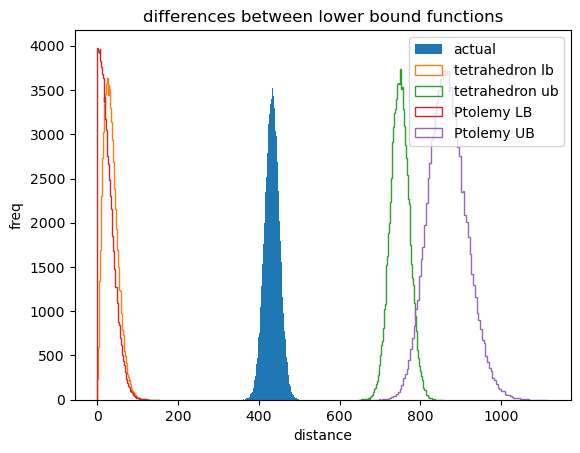

In [18]:
# simulate triangles
import numpy as np
import matplotlib.pyplot as plt
from scipy import spatial

rng = np.random.default_rng()

dist_func = lambda x, y: spatial.minkowski_distance(x, y, 2)
n_samples = 100000
dim = 200
points = rng.integers(-37, 38, size=[n_samples, 4, dim])
p0, p1, q, o = 0, 1, 2, 3
dists_p = dist_func(points[:, p0, :], points[:, p1, :])
dists_q0 = dist_func(points[:, p0, :], points[:, q, :])
dists_q1 = dist_func(points[:, p1, :], points[:, q, :])
dists_o0 = dist_func(points[:, p0, :], points[:, o, :])
dists_o1 = dist_func(points[:, p1, :], points[:, o, :])
dists_target = dist_func(points[:, q, :], points[:, o, :])

args = np.vstack((dists_p, dists_q0, dists_q1, dists_o0, dists_o1))
tet_lb = tetrahedron_lb(*args)
tet_ub = tetrahedron_ub(*args)
pto_lb = ptolemy_lb(*args)
pto_ub = ptolemy_ub(*args)

bins = 100
plt.hist(dists_target, bins=bins, label="actual")
plt.hist(tet_lb, bins=bins, histtype="step", label="tetrahedron lb")
plt.hist(tet_ub, bins=bins, histtype="step", label="tetrahedron ub")
plt.hist(pto_lb, bins=bins, histtype="step", label="Ptolemy LB")
plt.hist(pto_ub, bins=bins, histtype="step", label="Ptolemy UB")

plt.title("differences between lower bound functions")
plt.xlabel("distance")
plt.ylabel("freq")
plt.legend()
plt.show()

In [19]:
from uncertainties import ufloat

In [20]:
def compare_estimator(estimator):
    plt.subplot(2, 1, 1)
    plt.hist(estimator, bins=100, label="estimation")
    plt.hist(dists_target, bins=100, histtype="step", label="actual")
    plt.xlabel("distance")
    plt.legend()
    plt.subplot(2, 1, 2)
    error = estimator - dists_target
    plt.hist(error, bins=100)
    plt.xlabel("error")
    plt.tight_layout()

    print("Error:", ufloat(error.mean(), error.std()))
    print("Relative Error:", error.std() / dists_target.mean())

Error: 0+/-20
Relative Error: 0.04735456131607314


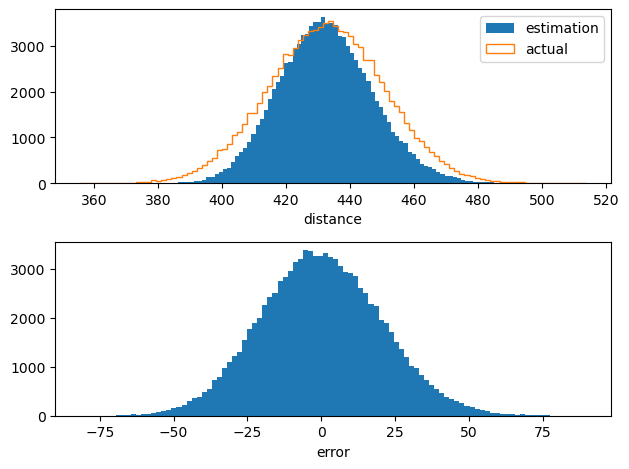

In [21]:
estimator = (tet_lb + tet_ub) / 2 + 42

compare_estimator(estimator)

Error: 13+/-28
Relative Error: 0.0648618419567325


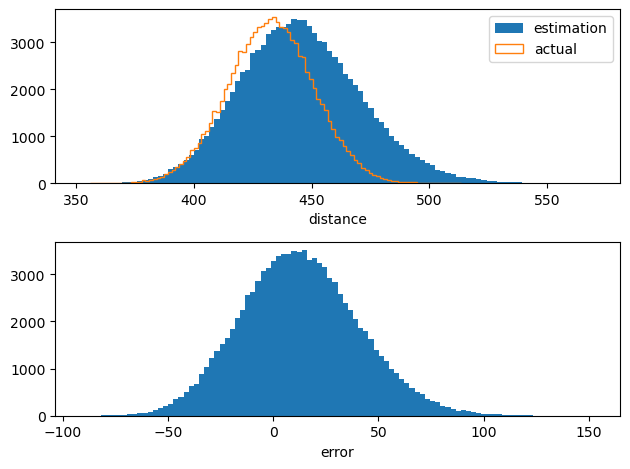

In [22]:
estimator = (pto_lb + pto_ub) / 2
compare_estimator(estimator)

Error: -11+/-23
Relative Error: 0.054195939236570845


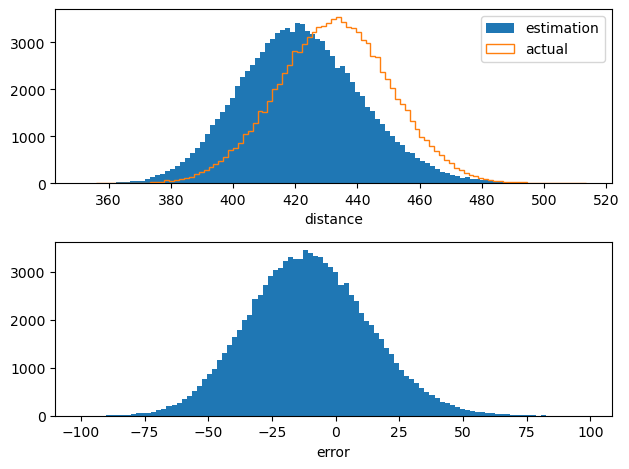

In [23]:
estimator = (tet_lb + tet_ub + pto_lb + pto_ub) / 4 + 4
compare_estimator(estimator)

Text(0, 0.5, 'counts')

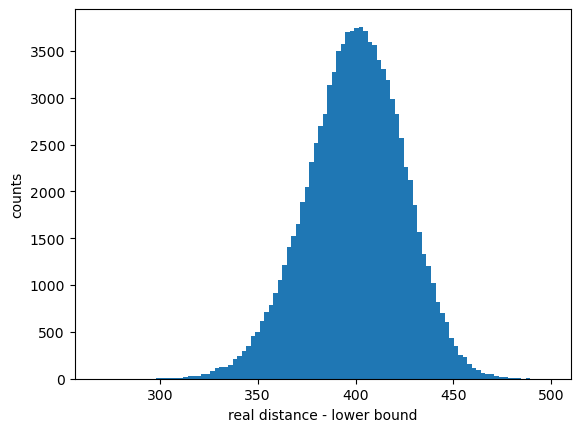

In [24]:
plt.hist(dists_target - tet_lb, bins=100)
plt.xlabel("real distance - lower bound")
plt.ylabel("counts")

In [25]:
def plt_circle(center, radius):
    circle = plt.Circle(center, radius, edgecolor="blue", facecolor="none")
    plt.gca().add_patch(circle)

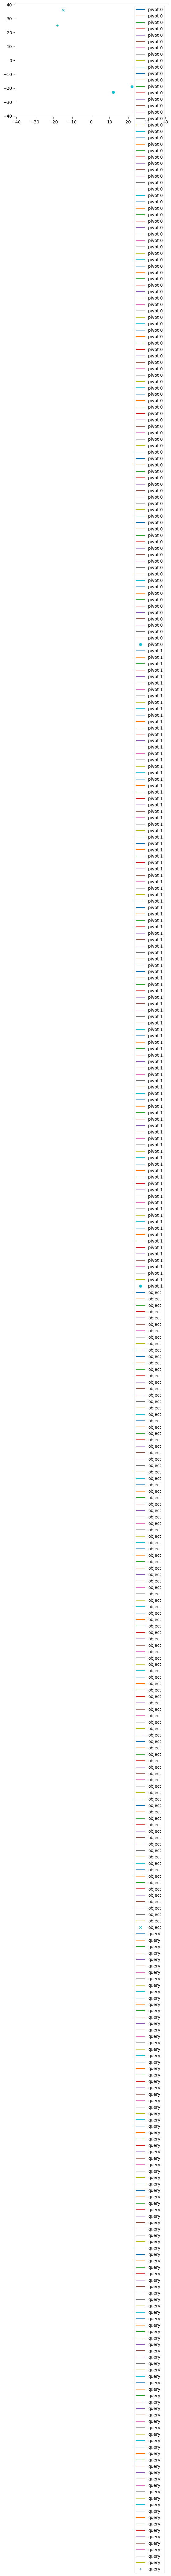

In [26]:
worst = (dists_target - tet_lb) > 20
worst_offenders = points[worst]

p1, p2, o, q = worst_offenders[0]


plt.plot(*p1, "o", label="pivot 0")
plt.plot(*p2, "o", label="pivot 1")
plt.plot(*o, "x", label="object")
plt.plot(*q, "+", label="query")

plt.legend()

In [27]:
worst_offenders[0]

array([[  7,  14,  -8, -37,  23,  11, -21,  -5, -26,   4,   2,  31, -27,
        -10,  20, -18, -24, -21, -31,  34, -36,  17,   2,  26,   5,  35,
         37, -35,  20,  15, -24,  13, -16, -18, -15,  -1, -22, -32,  11,
         14,  14, -36,  25,  37,  -1, -13, -24,  -6,  13, -35,  -2, -20,
         32,  29,  20,  16,   5,  22, -10, -29, -27,  18,  10, -28, -35,
        -21,  -5, -13, -27,   0,  34,  36,  27, -26, -21,  -6, -29,  16,
        -33, -27,   3,  -8,  16,  30,  32, -15,   5,  11,  30, -14,  31,
          4,  27, -10,  -7, -28,  21, -10,  -3,  36,  23, -12, -15,  -2,
         36, -33, -22, -22,  -8,  11, -29, -16, -14,  18,  -2, -31,  29,
          9,  35,  17,  -1, -26,  36,  -8,   3,   8,  14,  30,  34,  31,
          3,  -3, -34, -33, -30, -28,  33,  23,   1, -31,  33,   2,  -3,
         20, -16, -17,  32, -26, -25,  28,  10,  -6,  11, -10, -36,   9,
        -11,   9,  23,  26, -12,  11,  12, -21,  -6,  35,   3, -37,  21,
         15, -14,  27, -27,  15, -33,  37,   2, -16

In [27]:
plt.hist(-dists_target + tet_ub, bins=100)
plt.xlabel("upper bound - real distance")
plt.ylabel("counts")

KeyboardInterrupt: 

In [ ]:
violations = (dists_target - tet_lb) / dists_target < -0.01
sum(violations) / len(tet_lb)

In [ ]:
def violations(lb):
    return (dists_target < lb).sum() / len(dists_target)


violations_tet = violations(tet_lb)
violations_pto = violations(pto_n)
violations_tet, violations_pto

In [ ]:
plt.hist(pto_n - tet_lb, bins=100);

In [ ]:
plt.hist(dists_target - tet_lb, histtype="step", bins=100);
# plt.hist(tet_ub - dists_target, histtype="step");

In [ ]:
problems = np.abs(dists_target - my_lb_n) > 0.01
ppoints = points[problems, :, :]

plt.plot(*ppoints[0][:2].T)
for p in ppoints[0]:
    plt.plot(*p, "o")

plt.show()